>[Temperature Forecasting Analysis](#scrollTo=684e606a)

>>[1. Importing Libraries](#scrollTo=684e606a)

>>[2. Data Analysis](#scrollTo=684e606a)

>>[3. Basic Prediction- before feature Engineering](#scrollTo=684e606a)

>>[4. Feature Eng and analysis](#scrollTo=684e606a)

>>[5. Removing some Rows](#scrollTo=684e606a)

>>[6. Linear Regression](#scrollTo=684e606a)

>>[7. XGBRegressor](#scrollTo=684e606a)

>>[8. LinearBoostRegressor](#scrollTo=684e606a)

>>[9. MLP](#scrollTo=684e606a)

>>[10.XGBRegressor](#scrollTo=badfb7b4)



Import necessary libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

Reading train and test data set from CSV file

In [2]:
train=pd.read_csv('data/train.csv')
test=pd.read_csv('data/test.csv')

The code concatenates the training and test datasets along the columns, excluding the 'Indoor_temperature_room' column, to create a new combined dataset called 'total_data'.






In [3]:
total_data=pd.concat([train.drop(['Indoor_temperature_room'],axis=1),test],ignore_index=True)

# <h1 style='background:#9AB0BD; border:4; border-radius: 30px;height:60px; font-size:250%; font-weight: bold; color:black'><center>Temperature Forecasting Analysis</center></h1>

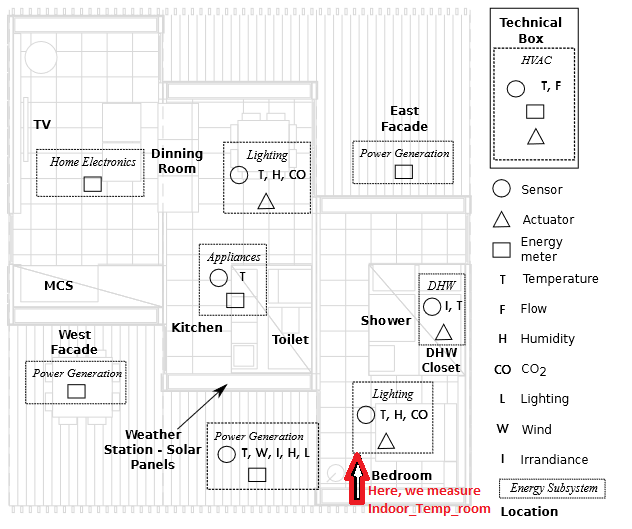


<a id='top'></a>
<div class="list-group" id="list-tab" role="tablist">
    
<h1 style='background:#9AB0BD; border:0;height:50px; border-radius: 10px; color:black'><center> TABLE OF CONTENTS </center></h1>

### [**1. Importing Libraries**](#title-one)
### [**2. Data Analysis**](#title-two)
### [**3. Basic Prediction- before feature Engineering**](#title-three)
### [**4. Feature Eng and analysis**](#title-four)
### [**5. Removing some Rows**](#title-five)
### [**6. Linear Regression**](#title-six)
### [**7. XGBRegressor**](#title-seven)
### [**8. LinearBoostRegressor**](#title-eight)
### [**9. MLP**](#title-nine)
    
<a id="title-one"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Importing Libraries</center></h1>

In [4]:
import pandas as pd
import numpy as np

In [5]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 10.4 MB/s eta 0:00:00


In [5]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

<a id="title-two"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Data Analysis</center></h1>

In [6]:
total_data.head()

,Id,Date,Time,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
0,0,13/03/2012,11:45,216.560,221.920,39.9125,42.4150,81.6650,113.520,0.0,623.360,1.42625,9690.24,12604.20,95436.8,758.880,48.3750,2.0
1,1,13/03/2012,12:00,219.947,220.363,39.9267,42.2453,81.7413,113.605,0.0,623.211,1.59200,11022.00,10787.20,95436.8,762.069,47.8080,2.0
2,2,13/03/2012,12:15,219.403,218.933,39.7720,42.2267,81.4240,113.600,0.0,622.656,1.89133,13960.50,9669.63,95398.6,766.251,47.4320,2.0
3,3,13/03/2012,12:30,218.613,217.045,39.7760,42.0987,81.5013,113.344,0.0,622.571,1.82800,18511.20,9648.13,95360.3,766.037,47.0240,2.0
4,4,13/03/2012,12:45,217.714,216.080,39.7757,42.0686,81.4657,113.034,0.0,622.400,2.36071,26349.00,9208.32,95354.9,762.743,45.4743,2.0


Observations:

> Time variable- values are noted for every 15minutes(can be changed into range of values).

> From observed 5 values, the Indoor_temperature_room increases with time(without zig-zag pattern).

> Time components are Date, Time, Day_of_the_week.

In [7]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4137 entries, 0 to 4136
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Id                                4137 non-null   int64  
 1   Date                              4137 non-null   object 
 2   Time                              4137 non-null   object 
 3   CO2_(dinning-room)                4137 non-null   float64
 4   CO2_room                          4137 non-null   float64
 5   Relative_humidity_(dinning-room)  4137 non-null   float64
 6   Relative_humidity_room            4137 non-null   float64
 7   Lighting_(dinning-room)           4137 non-null   float64
 8   Lighting_room                     4137 non-null   float64
 9   Meteo_Rain                        4137 non-null   float64
 10  Meteo_Sun_dusk                    4137 non-null   float64
 11  Meteo_Wind                        4137 non-null   float64
 12  Meteo_

The code calculates and displays descriptive statistics (mean, standard deviation, min, max, quartiles, etc.) for each numerical column in the 'total_data' dataset.






In [8]:
total_data.describe()

,Id,CO2_(dinning-room),CO2_room,Relative_humidity_(dinning-room),Relative_humidity_room,Lighting_(dinning-room),Lighting_room,Meteo_Rain,Meteo_Sun_dusk,Meteo_Wind,Meteo_Sun_light_in_west_facade,Meteo_Sun_light_in_east_facade,Meteo_Sun_light_in_south_facade,Meteo_Sun_irradiance,Outdoor_relative_humidity_Sensor,Day_of_the_week
count,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000,4137.000000
mean,2068.000000,206.599835,209.611623,42.389879,44.546069,28.970248,42.335496,0.038756,335.094312,1.304623,14749.149509,13566.284958,19857.184071,232.203649,53.251632,3.962549
std,1194.393361,22.763114,24.183477,7.215405,8.297436,25.684356,42.602571,0.187128,304.513038,1.223829,25306.450482,23311.852941,29494.598354,312.460713,13.511063,1.988923
min,0.000000,187.339000,188.907000,26.173300,27.256000,10.740000,11.328000,0.000000,0.606667,0.000000,0.000000,0.000000,0.000000,-4.164670,22.246700,1.000000
25%,1034.000000,200.228000,201.707000,36.088000,38.446700,11.540700,13.509300,0.000000,0.650000,0.168667,0.000000,0.000000,0.000000,-3.250670,42.650700,2.000000
50%,2068.000000,205.131000,208.907000,42.776000,44.802700,14.126700,22.085300,0.000000,612.821000,0.962667,752.640000,1025.020000,645.120000,11.246000,54.717300,4.000000
75%,3102.000000,210.016000,212.331000,47.584000,50.301300,40.034700,55.064000,0.000000,619.712000,2.225330,14627.500000,12907.200000,33263.600000,479.552000,63.128000,6.000000
max,4136.000000,594.389000,609.237000,60.957300,62.594700,111.797000,162.965000,1.000000,625.003000,6.321330,95278.400000,92367.500000,95704.400000,1094.660000,83.805300,7.000000


The code checks for the presence of missing (NaN) values in the 'total_data' dataset and returns the count of missing values for each column. It confirms that there are no missing values in the dataset.






In [9]:
#No nan values in the dataset.
total_data.isnull().sum()

Id                                  0
Date                                0
Time                                0
CO2_(dinning-room)                  0
CO2_room                            0
Relative_humidity_(dinning-room)    0
Relative_humidity_room              0
Lighting_(dinning-room)             0
Lighting_room                       0
Meteo_Rain                          0
Meteo_Sun_dusk                      0
Meteo_Wind                          0
Meteo_Sun_light_in_west_facade      0
Meteo_Sun_light_in_east_facade      0
Meteo_Sun_light_in_south_facade     0
Meteo_Sun_irradiance                0
Outdoor_relative_humidity_Sensor    0
Day_of_the_week                     0
dtype: int64

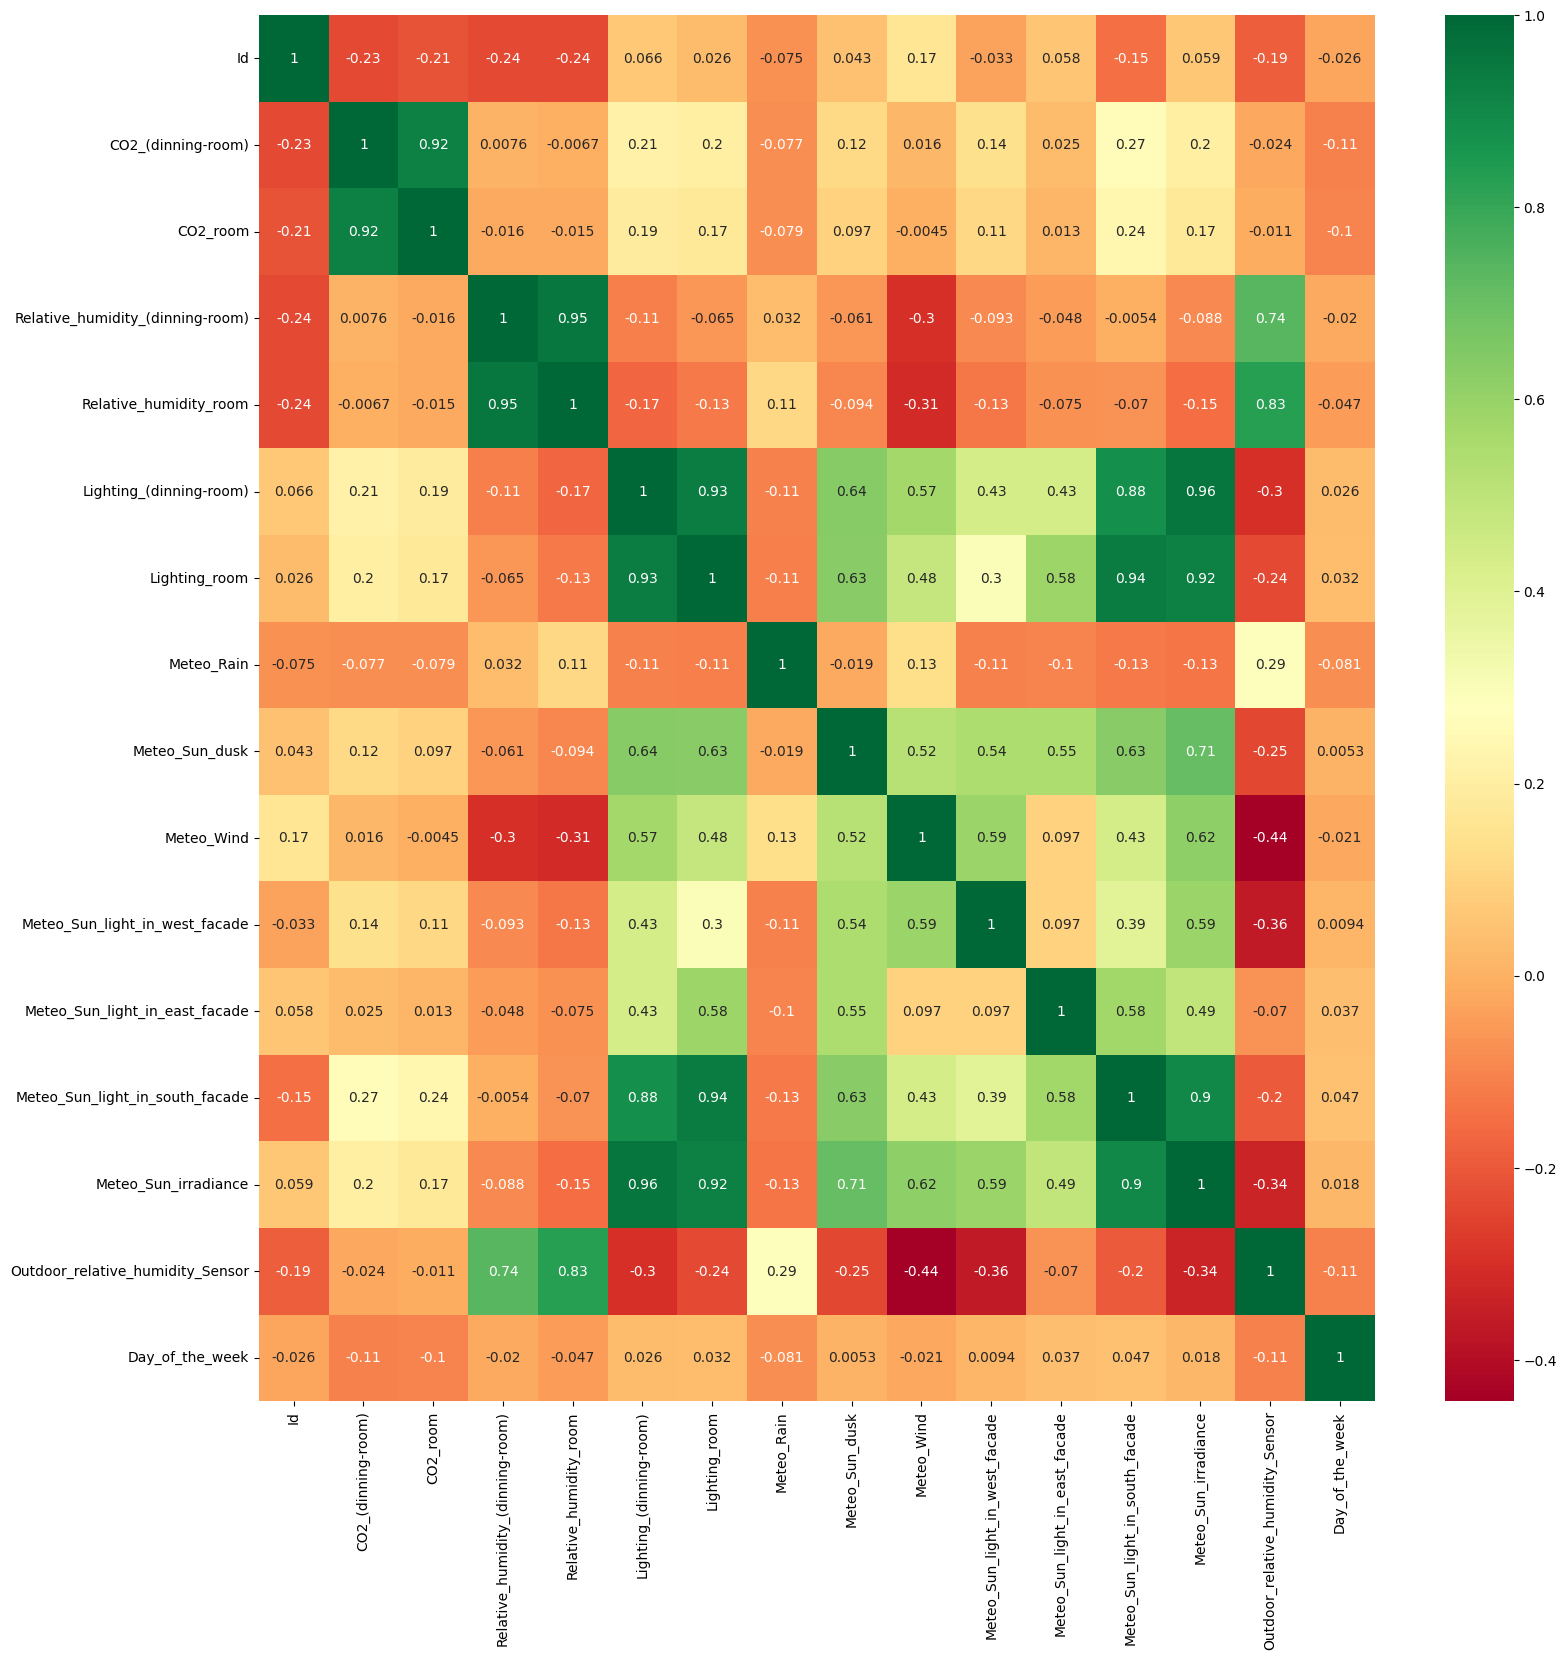

In [12]:
numeric_data = total_data.select_dtypes(include='number')
plt.figure(figsize=(18, 18))
sns.heatmap(numeric_data.corr(), annot=True, cmap="RdYlGn")
plt.show()


The code creates a correlation heatmap using Seaborn library to visualize the correlation between the numerical columns in the 'total_data' dataframe. The heatmap shows the strength and direction of the linear relationships between the variables, with annotated correlation values.






> Some of the variables are highly correlated with each other(Ex:-CO2_(dinning-room),CO2_room), which leads to multicollinearity.

1. Remove some of the highly correlated independent variables.
2. Linearly combine the independent variables, such as adding them together.
3. Perform an analysis designed for highly correlated variables, such as principal components analysis or partial least squares regression.
4. LASSO and Ridge regression are advanced forms of regression analysis that can handle multicollinearity. If you know how to perform linear least squares regression, you’ll be able to handle these analyses with just a little additional study.

In [13]:
train.columns

Index(['Id', 'Date', 'Time', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Indoor_temperature_room'],
      dtype='object')

From the Graph

> Output has high correlation between variables Relavtive_humidity_room,Meteo_Sun_light_in_west_facade, Outdoor_relative_humidity_Sensor.

> Least correlation with Lighting_room,Meteo_Sun_light_in_south_facade

The code creates histograms for each numerical column in the 'train' dataframe using Matplotlib. It sets the number of bins to 10 and adjusts the layout to fit the histograms neatly within the plot.






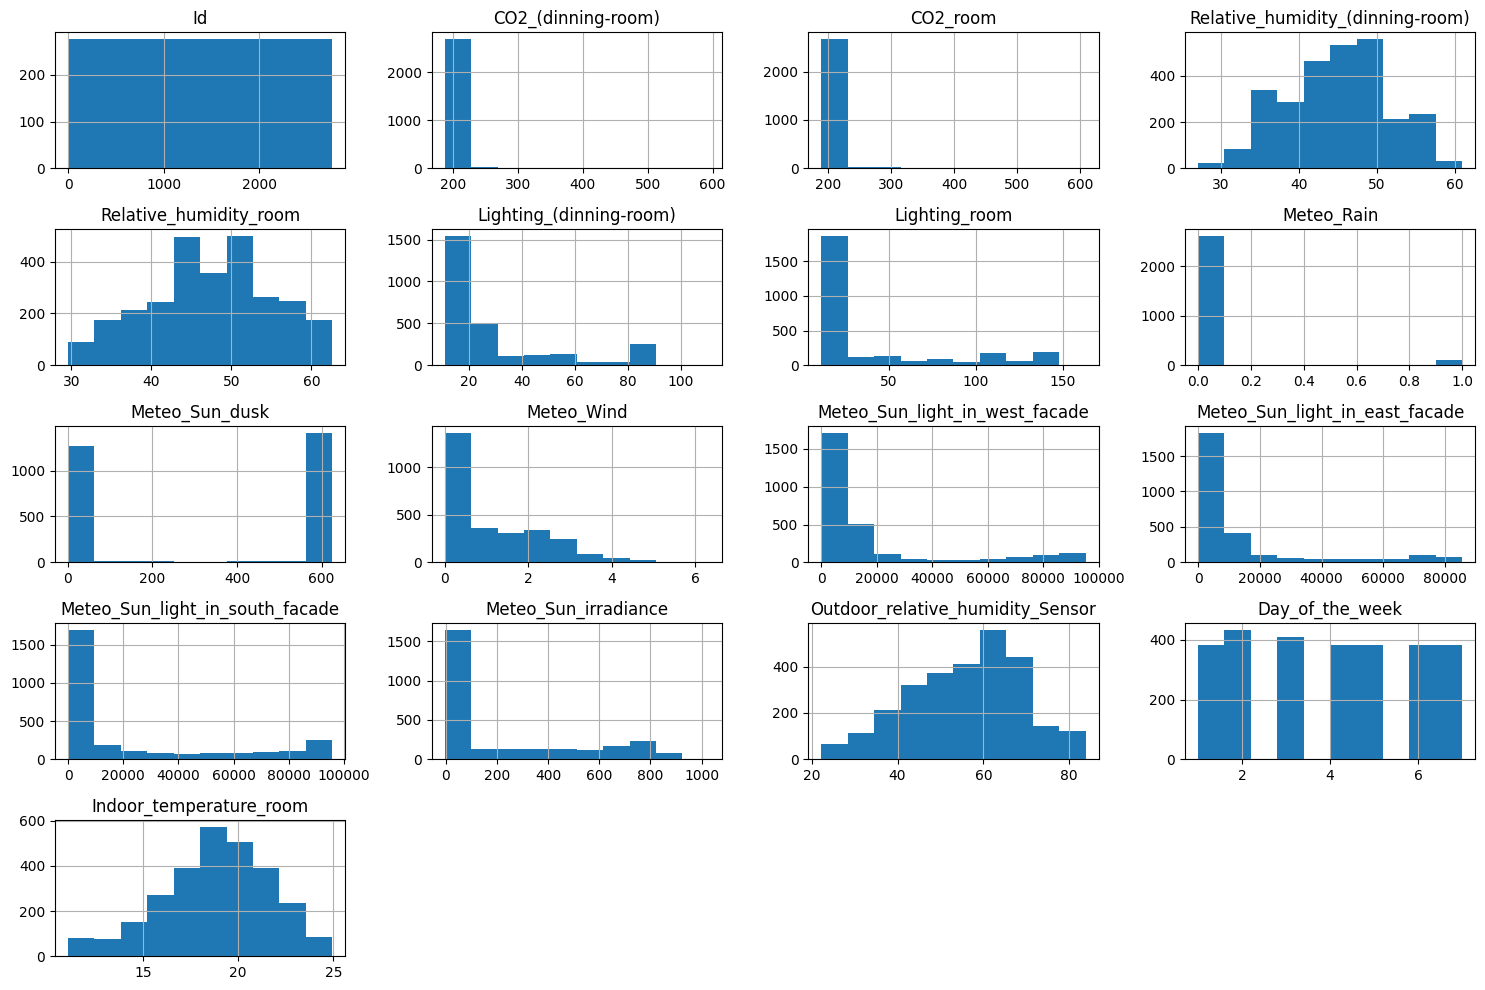

In [14]:
train.hist(bins=10, figsize=(15, 10))
plt.tight_layout()

>  Relative_humidity_(dinning room) and Outdoor_relative_humidity_Sensor are left skewed(so can apply log function)

<a id="title-three"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Basic Prediction- before feature Engineering
</center></h1>

The code separates the input features 'X' and target variable 'Y' from the 'train' dataframe. Then, it splits the data into training and validation sets (x_train, x_val, y_train, y_val) using a test size of 20% and a random seed of 40 for reproducibility.






In [15]:
X=train.drop(['Indoor_temperature_room','Id','Date','Time'],axis=1)
Y=train['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.2, random_state=40)

The code creates a linear regression model 'lnr' and fits it to the training data (x_train, y_train). It then makes predictions on the training data and calculates the mean squared error (MSE) between the predicted values and the actual target values to evaluate the model's accuracy.






In [16]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_train)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_train))

Basic model prediction accuracy= 3.5880482144018337


The code uses the trained linear regression model 'lnr' to make predictions on the validation data (x_val), and then calculates the mean squared error (MSE) between the predicted values and the actual target values (y_val) to evaluate the model's accuracy on the validation set.






In [17]:
y_pred=lnr.predict(x_val)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_val))

Basic model prediction accuracy= 3.640814867677315


<a id="title-four"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Feature Eng and analysis</center></h1>

The code converts the 'Date' column to a datetime format, extracts the day of the year as a new feature 'Day', converts the 'Time' column to datetime format, calculates the number of minutes elapsed in the day as a new feature 'Minutes', and converts the 'Day_of_the_week' column to integers.






In [18]:
total_data['Date']=pd.to_datetime(total_data['Date'],format="%d/%m/%Y")
total_data['Day']=total_data['Date'].dt.dayofyear.astype(float)
total_data['Time']=pd.DatetimeIndex(total_data['Time'])
total_data['Minutes']=total_data['Time'].apply(lambda x: x.hour *60 + x.minute).astype(float)
total_data['Day_of_the_week']=total_data['Day_of_the_week'].astype(int)

The code merges the 'total_data' DataFrame with the 'train' DataFrame on the 'Id' column, creating a new DataFrame named 'X_1' with additional information about the 'Indoor_temperature_room' from the 'train' DataFrame.






In [19]:
X_1=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')

The code defines a function called 'seasonal_plot' to create a seasonal plot of 'Indoor_temperature_room' with respect to 'Day' and 'Minutes' in the DataFrame 'X_1'. The plot shows how the temperature varies during different days at different minutes of the day.






<Axes: title={'center': 'Seasonal Plot (Day/Minutes)'}, xlabel='Minutes', ylabel='Indoor_temperature_room'>

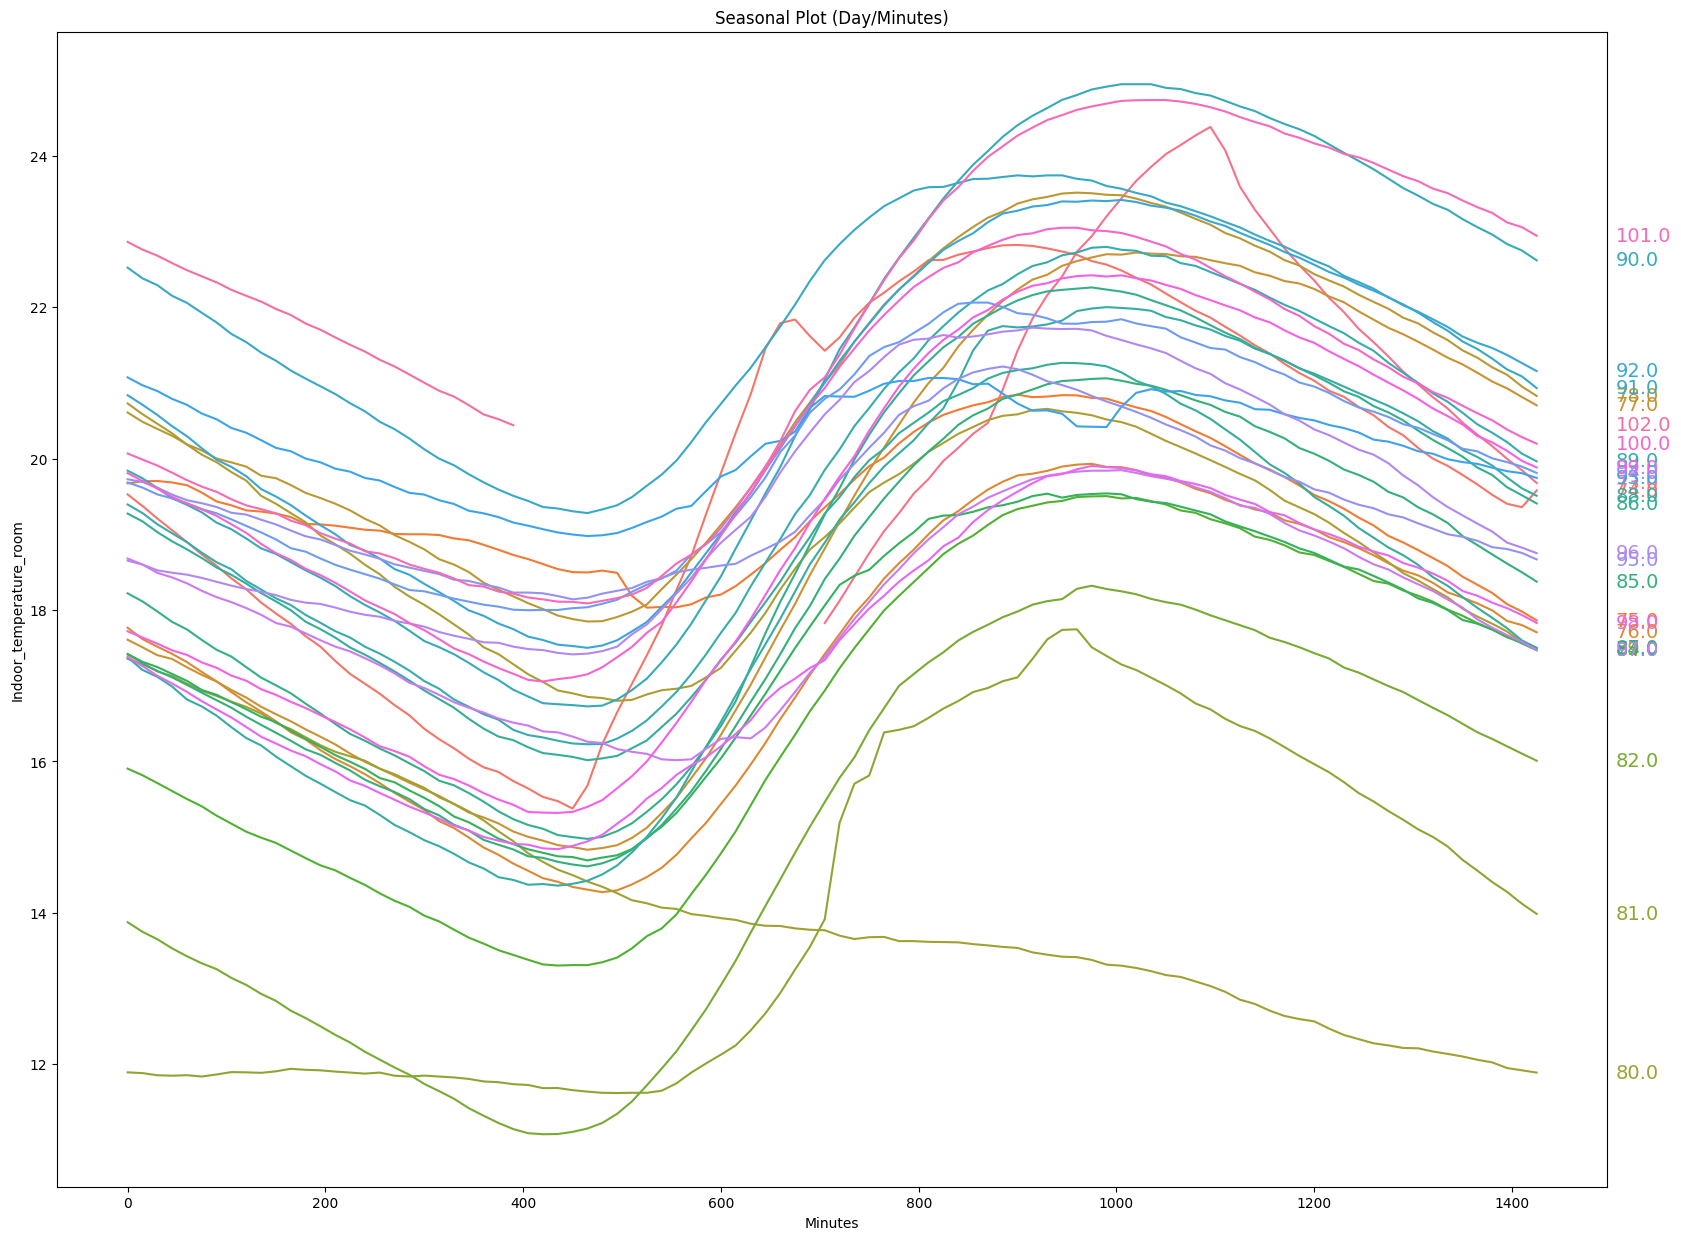

In [20]:
def seasonal_plot(X, y, period, freq, ax=None):
    if ax is None:
        _, ax = plt.subplots()
    palette = sns.color_palette("husl", n_colors=X[period].nunique(),)
    ax = sns.lineplot(
        x=freq,
        y=y,
        hue=period,
        data=X,
        ci=False,
        ax=ax,
        palette=palette,
        legend=False,
    )
    ax.set_title(f"Seasonal Plot ({period}/{freq})")
    for line, name in zip(ax.lines, X[period].unique()):
        y_ = line.get_ydata()[-1]
        ax.annotate(
            name,
            xy=(1, y_),
            xytext=(6, 0),
            color=line.get_color(),
            xycoords=ax.get_yaxis_transform(),
            textcoords="offset points",
            size=14,
            va="center",
        )
    return ax
fig,ax0=plt.subplots(figsize=(20,15))
seasonal_plot(X_1, y="Indoor_temperature_room", period="Day", freq="Minutes", ax=ax0)

> Clearly a seasonality curve with respect to hour each day

>Day 80 seems like an Outlier

The code creates a plot with two lines, one representing the 'Meteo_Rain' and the other representing 'Indoor_temperature_room' with respect to the 'Id' in the DataFrame 'X_1'. The plot allows comparison between the two variables.






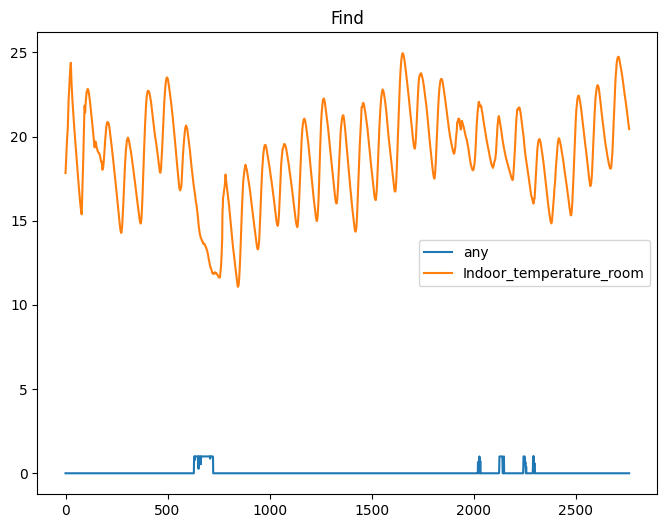

In [21]:
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(X_1['Id'],(X_1['Meteo_Rain']),label='any')
ax.plot(X_1['Id'],X_1['Indoor_temperature_room'],label='Indoor_temperature_room')
ax.set_title('Find')
plt.legend()
plt.show()

> Comparing with all other variables

The code creates a boxplot for the numerical columns in the DataFrame 'X_1', excluding the specified columns 'Time', 'Id', 'Date', 'Minutes', 'Day', and 'Day_of_the_week'. The plot helps visualize the distribution and identify potential outliers in the data.






([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, 'CO2_(dinning-room)'),
  Text(1, 0, 'CO2_room'),
  Text(2, 0, 'Relative_humidity_(dinning-room)'),
  Text(3, 0, 'Relative_humidity_room'),
  Text(4, 0, 'Lighting_(dinning-room)'),
  Text(5, 0, 'Lighting_room'),
  Text(6, 0, 'Meteo_Rain'),
  Text(7, 0, 'Meteo_Sun_dusk'),
  Text(8, 0, 'Meteo_Wind'),
  Text(9, 0, 'Meteo_Sun_light_in_west_facade'),
  Text(10, 0, 'Meteo_Sun_light_in_east_facade'),
  Text(11, 0, 'Meteo_Sun_light_in_south_facade'),
  Text(12, 0, 'Meteo_Sun_irradiance'),
  Text(13, 0, 'Outdoor_relative_humidity_Sensor'),
  Text(14, 0, 'Indoor_temperature_room')])

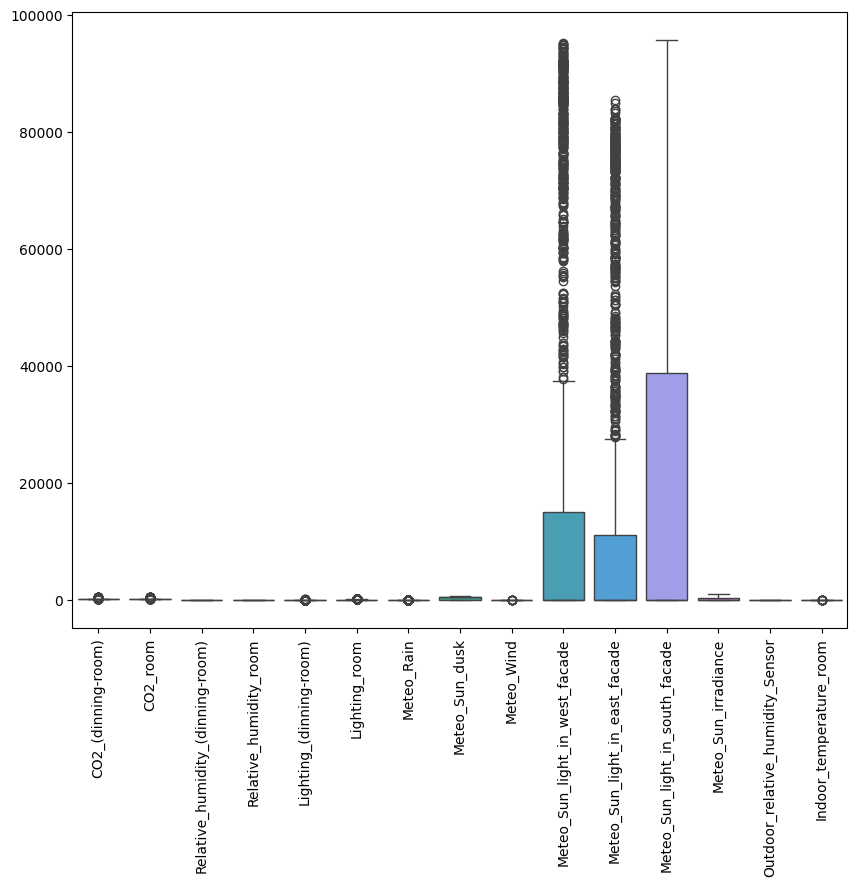

In [22]:
fig,ax=plt.subplots(figsize=(10,8))
sns.boxplot(data=X_1.drop(['Time','Id','Date','Minutes','Day','Day_of_the_week'],axis=1))
plt.xticks(rotation=90)

> lot of values seems like not important(values nearly equall to zero, might be noise)

The code creates a line plot with the 'Id' column on the x-axis and the 'Indoor_temperature_room' column on the y-axis from the DataFrame 'X_1'. The plot helps visualize the trend of indoor temperature over time.






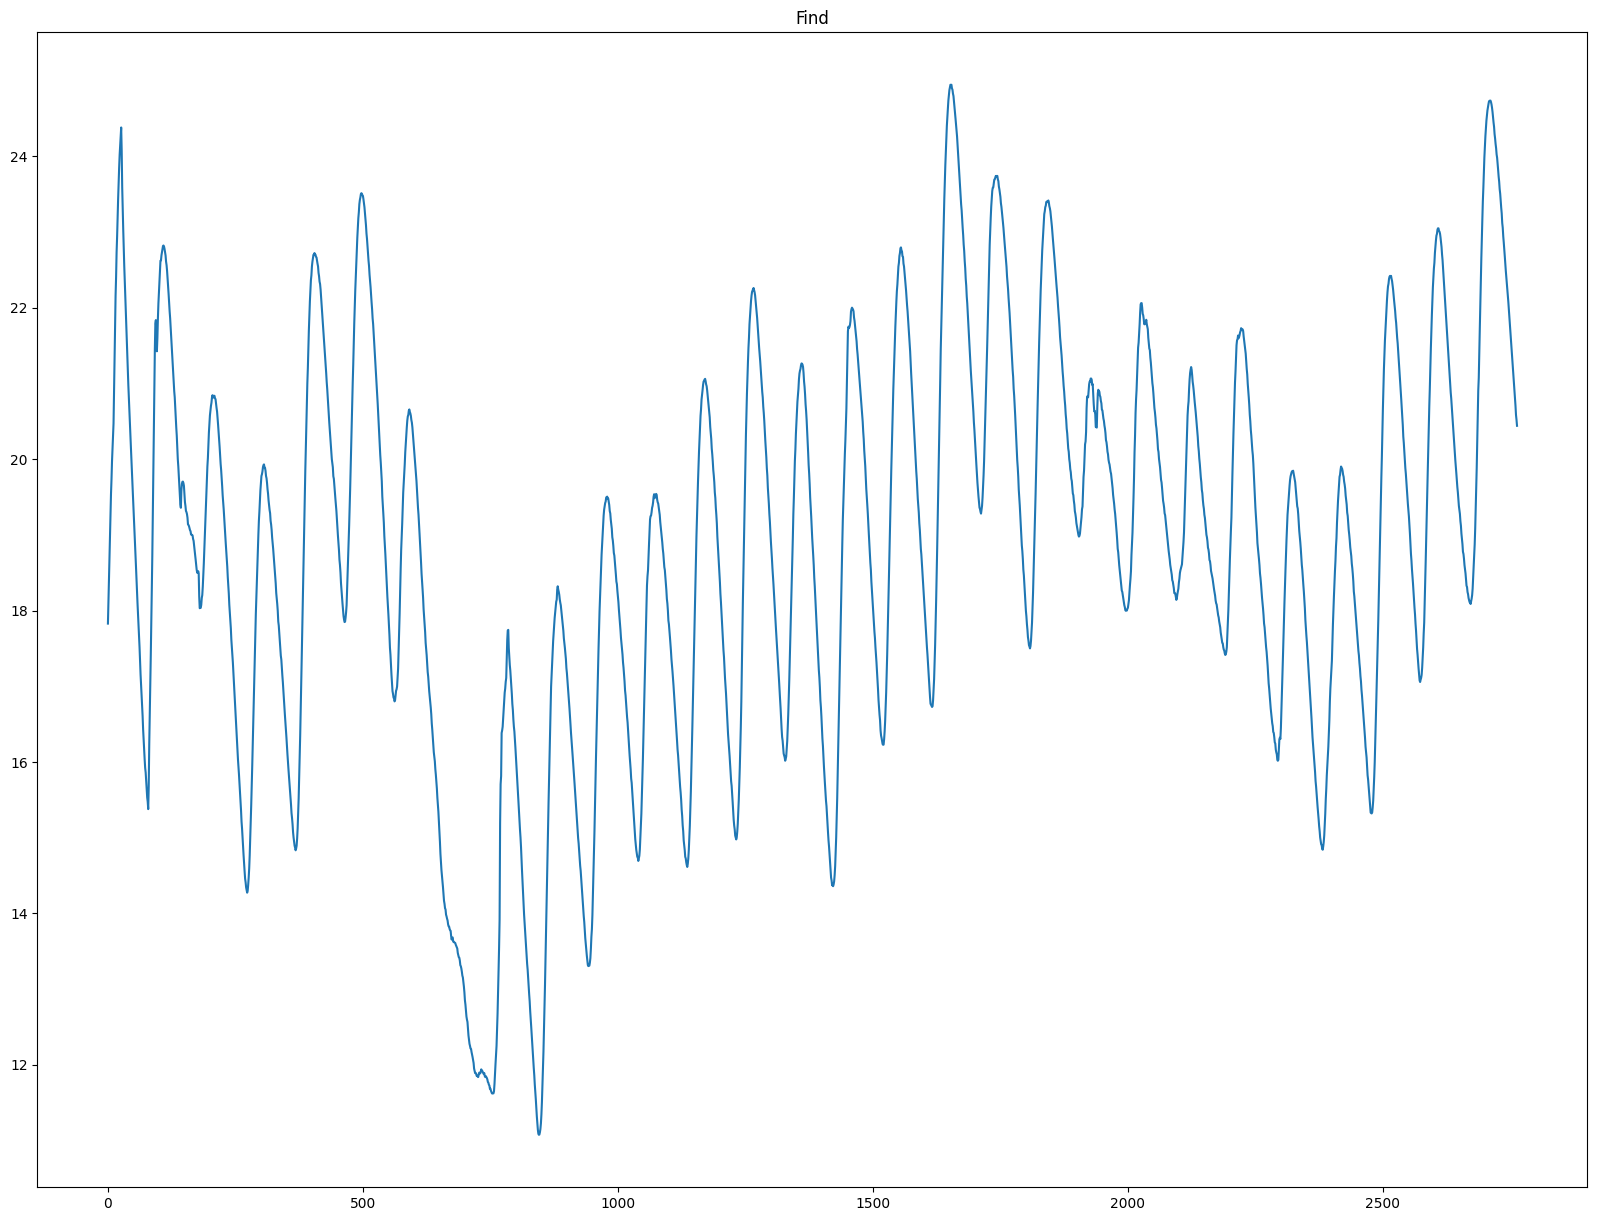

In [23]:
fig,ax=plt.subplots(figsize=(20,15))
ax.plot(X_1['Id'],X_1['Indoor_temperature_room'])
ax.set_title('Find')
plt.show()

> No long term trend(bcz Date is only from 13 to 11, nearly a month), but seasonality exist within a Day

The code creates a line plot with the 'Id' column on the x-axis and the 'Indoor_temperature_room' and 'Lighting_room' columns on the y-axis from the DataFrame 'X_1'. The 'Lighting_room' values are divided by 4 for better visualization and are plotted along with the 'Indoor_temperature_room'. The plot helps compare the trends of these two variables over time.






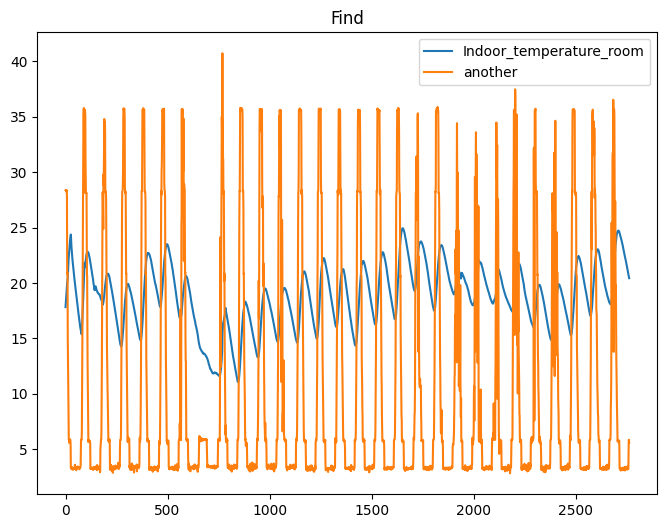

In [24]:
Q1=X_1['Indoor_temperature_room']
Q3=X_1['Lighting_room']
fig,ax=plt.subplots(figsize=(8,6))
ax.plot(X_1['Id'],Q1,label='Indoor_temperature_room')
ax.plot(X_1['Id'],Q3/4,label='another')
ax.set_title('Find')
plt.legend()
plt.show()

<a id="title-five"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Removing some rows</center></h1>

> Day 73 and 102 does not have all values(24hrs) in training dataset

The code filters out rows with the 'Day' value equal to 80 from the 'total_data' DataFrame and then merges the resulting DataFrame with the 'train' DataFrame on the 'Id' column to create a new DataFrame named 'X_1'.






In [25]:
total_data=total_data[(total_data['Day']!=80)]
X_1=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')

The code groups the 'X_1' DataFrame by the 'Minutes' column, calculates the mean value of 'Indoor_temperature_room' for each unique 'Minutes' value, and stores the result in a new DataFrame named 'Q2'.






In [26]:
Q2=X_1[['Indoor_temperature_room','Minutes']].groupby(['Minutes']).mean().reset_index()

The code creates a line plot using the 'Minutes' column as the x-axis and the mean 'Indoor_temperature_room' values as the y-axis, visualizing the trend of temperature changes over time during the day.






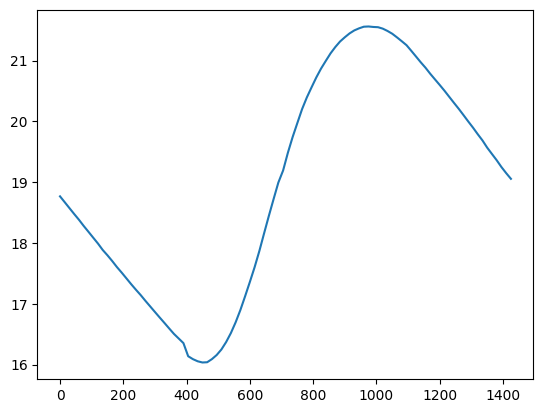

In [27]:
fig,ax=plt.subplots()
ax.plot(Q2['Minutes'],Q2['Indoor_temperature_room'])
plt.show()

The code generates a sine wave and plots it using Matplotlib. The x-axis represents values from 0 to 1400, and the y-axis shows the corresponding negative sine values, creating a downward sinusoidal waveform.






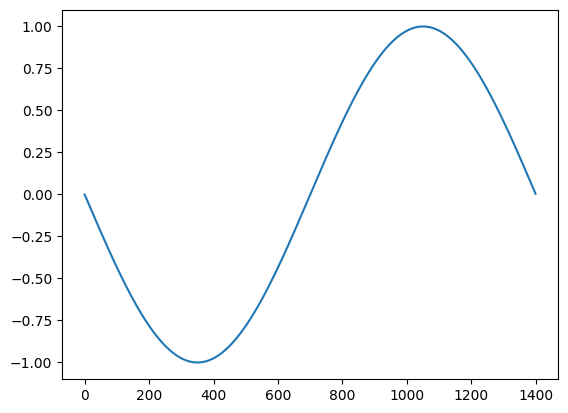

In [28]:
a1=np.arange(0,1400)
a2=-np.sin(2*np.pi*a1/1400)
fig,ax=plt.subplots()
ax.plot(a1,a2)
plt.show()

> Here, I have decided to subtract the average values(00:00 to 24:00) of all days from Output variable and predict for remaining part

The code renames the column 'Indoor_temperature_room' to 'Out_avg' in the DataFrame 'Q2'.






In [29]:
Q2.rename(columns={'Indoor_temperature_room':'Out_avg'},inplace=True)

The code merges the DataFrame 'total_data' with DataFrame 'Q2' based on the 'Minutes' column, sorts the result by 'Id', and then removes the unnecessary index column from 'total_data'.






In [30]:
total_data=pd.merge(total_data,Q2, on='Minutes').sort_values(['Id']).reset_index()
total_data=total_data.iloc[:,1:]

> Algorithms that do not require normalization/scaling are the ones that rely on rules. They would not be affected by any monotonic transformations of the variables. Scaling is a monotonic transformation. Examples of algorithms in this category are all the tree-based algorithms — CART, Random Forests, Gradient Boosted Decision Trees. These algorithms utilize rules (series of inequalities) and do not require normalization.

The code first merges the DataFrames 'total_data' and 'train' based on the 'Id' column and then plots a heatmap showing the correlation between the variables in the merged DataFrame 'X_1'.






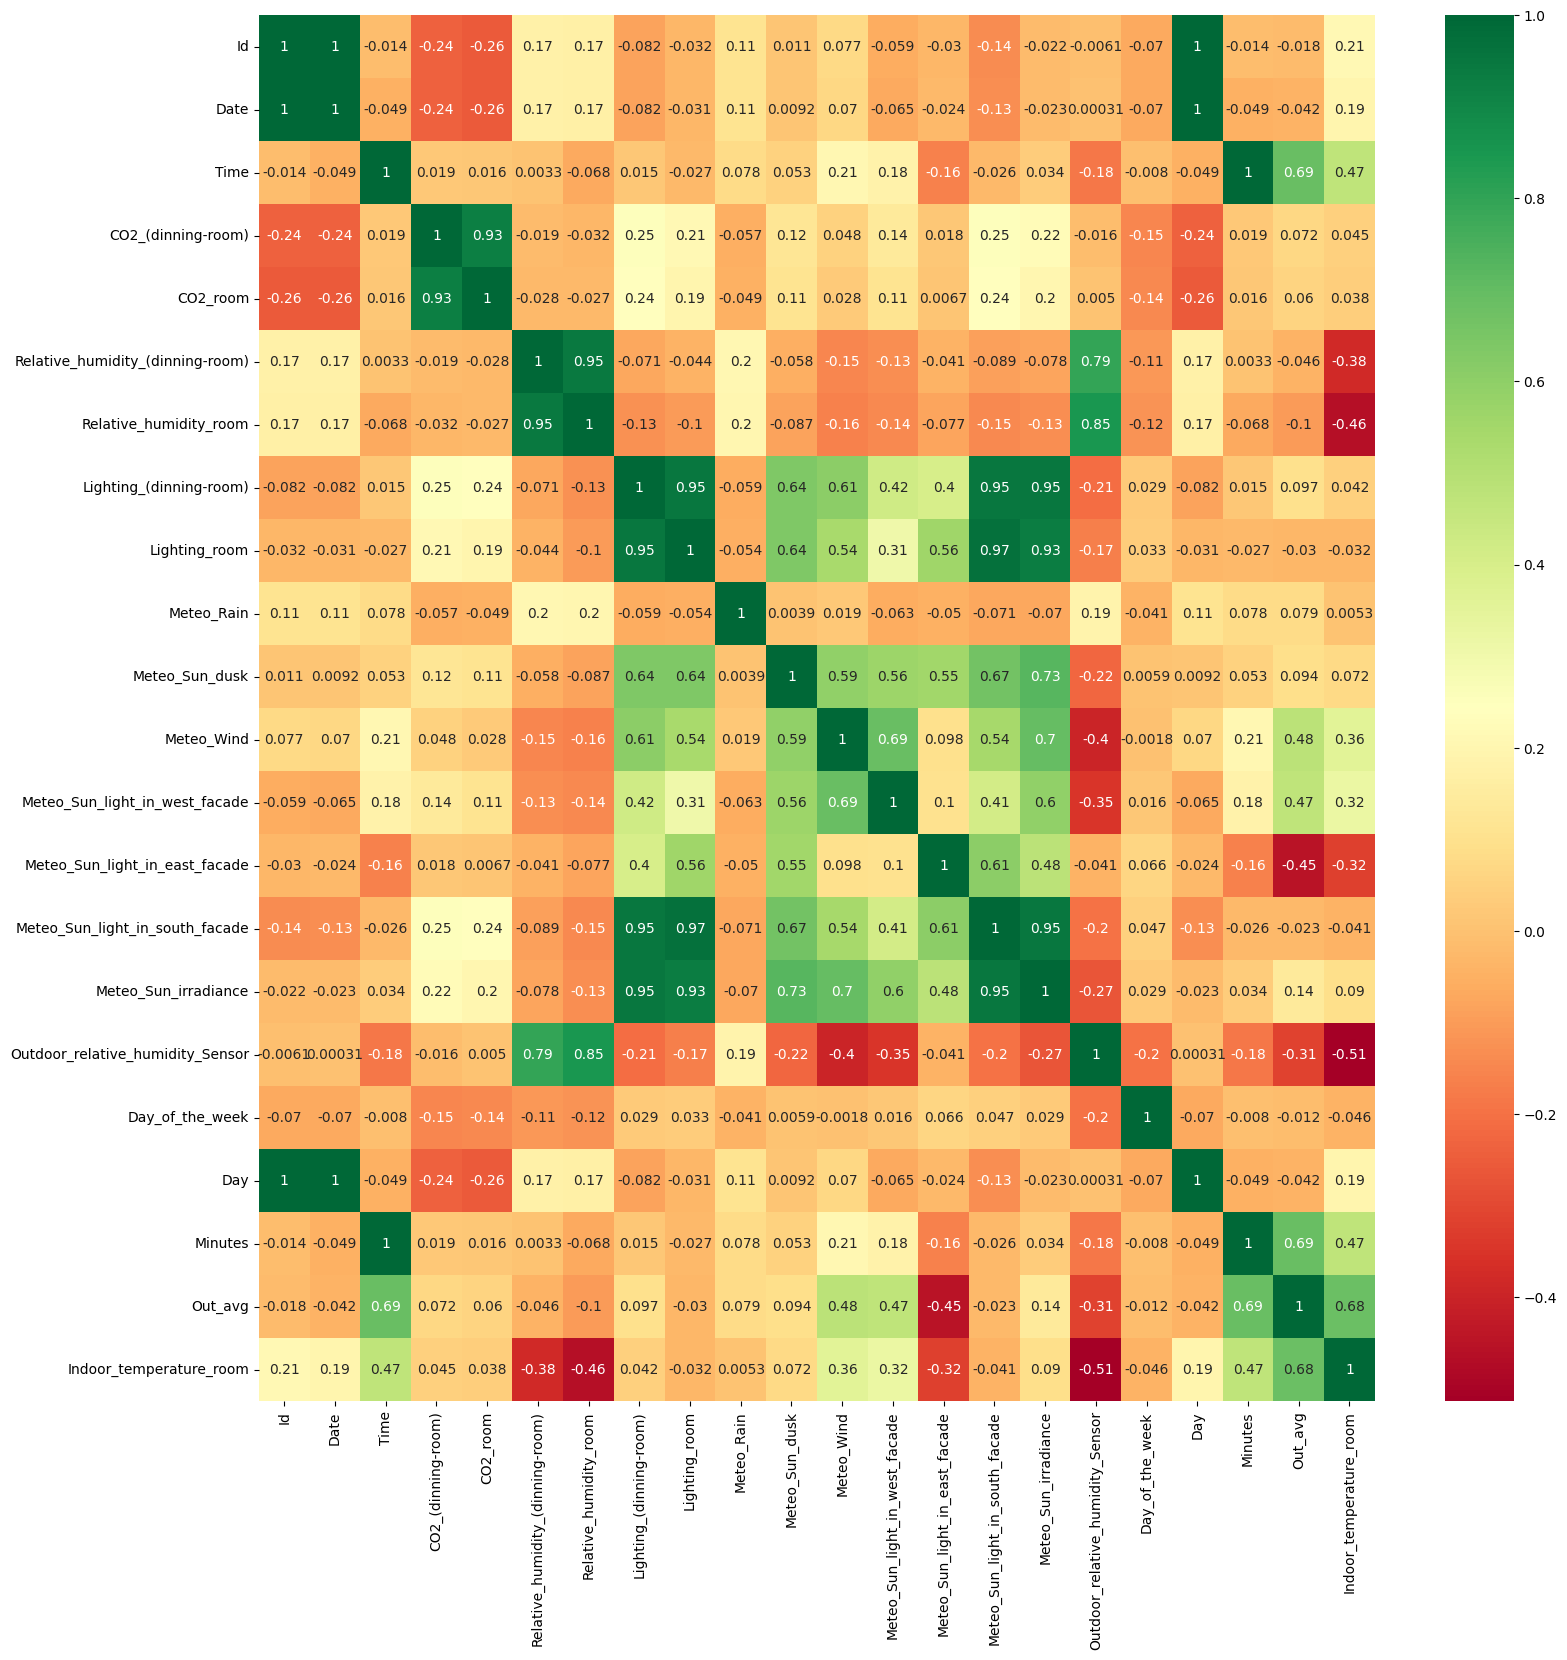

In [31]:
X_1=pd.merge(total_data,train[['Id','Indoor_temperature_room']],on='Id')
plt.figure(figsize = (18,18))
sns.heatmap(X_1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

In [32]:
total_data.columns

Index(['Id', 'Date', 'Time', 'CO2_(dinning-room)', 'CO2_room',
       'Relative_humidity_(dinning-room)', 'Relative_humidity_room',
       'Lighting_(dinning-room)', 'Lighting_room', 'Meteo_Rain',
       'Meteo_Sun_dusk', 'Meteo_Wind', 'Meteo_Sun_light_in_west_facade',
       'Meteo_Sun_light_in_east_facade', 'Meteo_Sun_light_in_south_facade',
       'Meteo_Sun_irradiance', 'Outdoor_relative_humidity_Sensor',
       'Day_of_the_week', 'Day', 'Minutes', 'Out_avg'],
      dtype='object')

The code includes several commented lines, which seem to calculate the rolling averages or shifts for some columns in the 'total_data' DataFrame. It then extracts the 'Id' and 'Out_avg' columns from 'total_data' to form a new DataFrame 'ad', and finally, modifies the 'final_data' DataFrame by multiplying the 'Meteo_Rain' column values by 10.






In [33]:
#total_data['Relative_humidity_avg']=(total_data['Relative_humidity_(dinning-room)']).shift(1).bfill()
#total_data['CO2_avg']=(total_data['CO2_(dinning-room)']).shift(1).bfill()
#total_data['light_total']=(total_data['Lighting_(dinning-room)']).shift(1).bfill()
#total_data['Meteo_Rain_lg']=total_data['Meteo_Rain'].shift(1).bfill()
#total_data['Outdoor_relative_humidity_Sensor_lg']=total_data['Outdoor_relative_humidity_Sensor'].shift(1).bfill()
#total_data['Outdoor_relative_humidity_Sensor-lag']=total_data['Outdoor_relative_humidity_Sensor'].shift(1).bfill()
#required_features=['Id','Relative_humidity_avg','Meteo_Rain','Meteo_Wind','Meteo_Sun_light_in_west_facade','Meteo_Sun_light_in_east_facade','Outdoor_relative_humidity_Sensor','Out_avg']
ad=total_data[['Id','Out_avg']]
final_data=total_data.drop(['Minutes','Out_avg','Date','Time','Day_of_the_week'],axis=1)
final_data['Meteo_Rain']=final_data['Meteo_Rain']*10

Give me very short 1-2 sentences to describe what do they do in the given code below:
The code merges the 'final_data' DataFrame with the 'train' DataFrame on the 'Id' column to create 'X_1'. It then generates a heatmap of the correlation matrix of 'X_1' and visualizes it using Seaborn, with correlation values annotated on the plot.





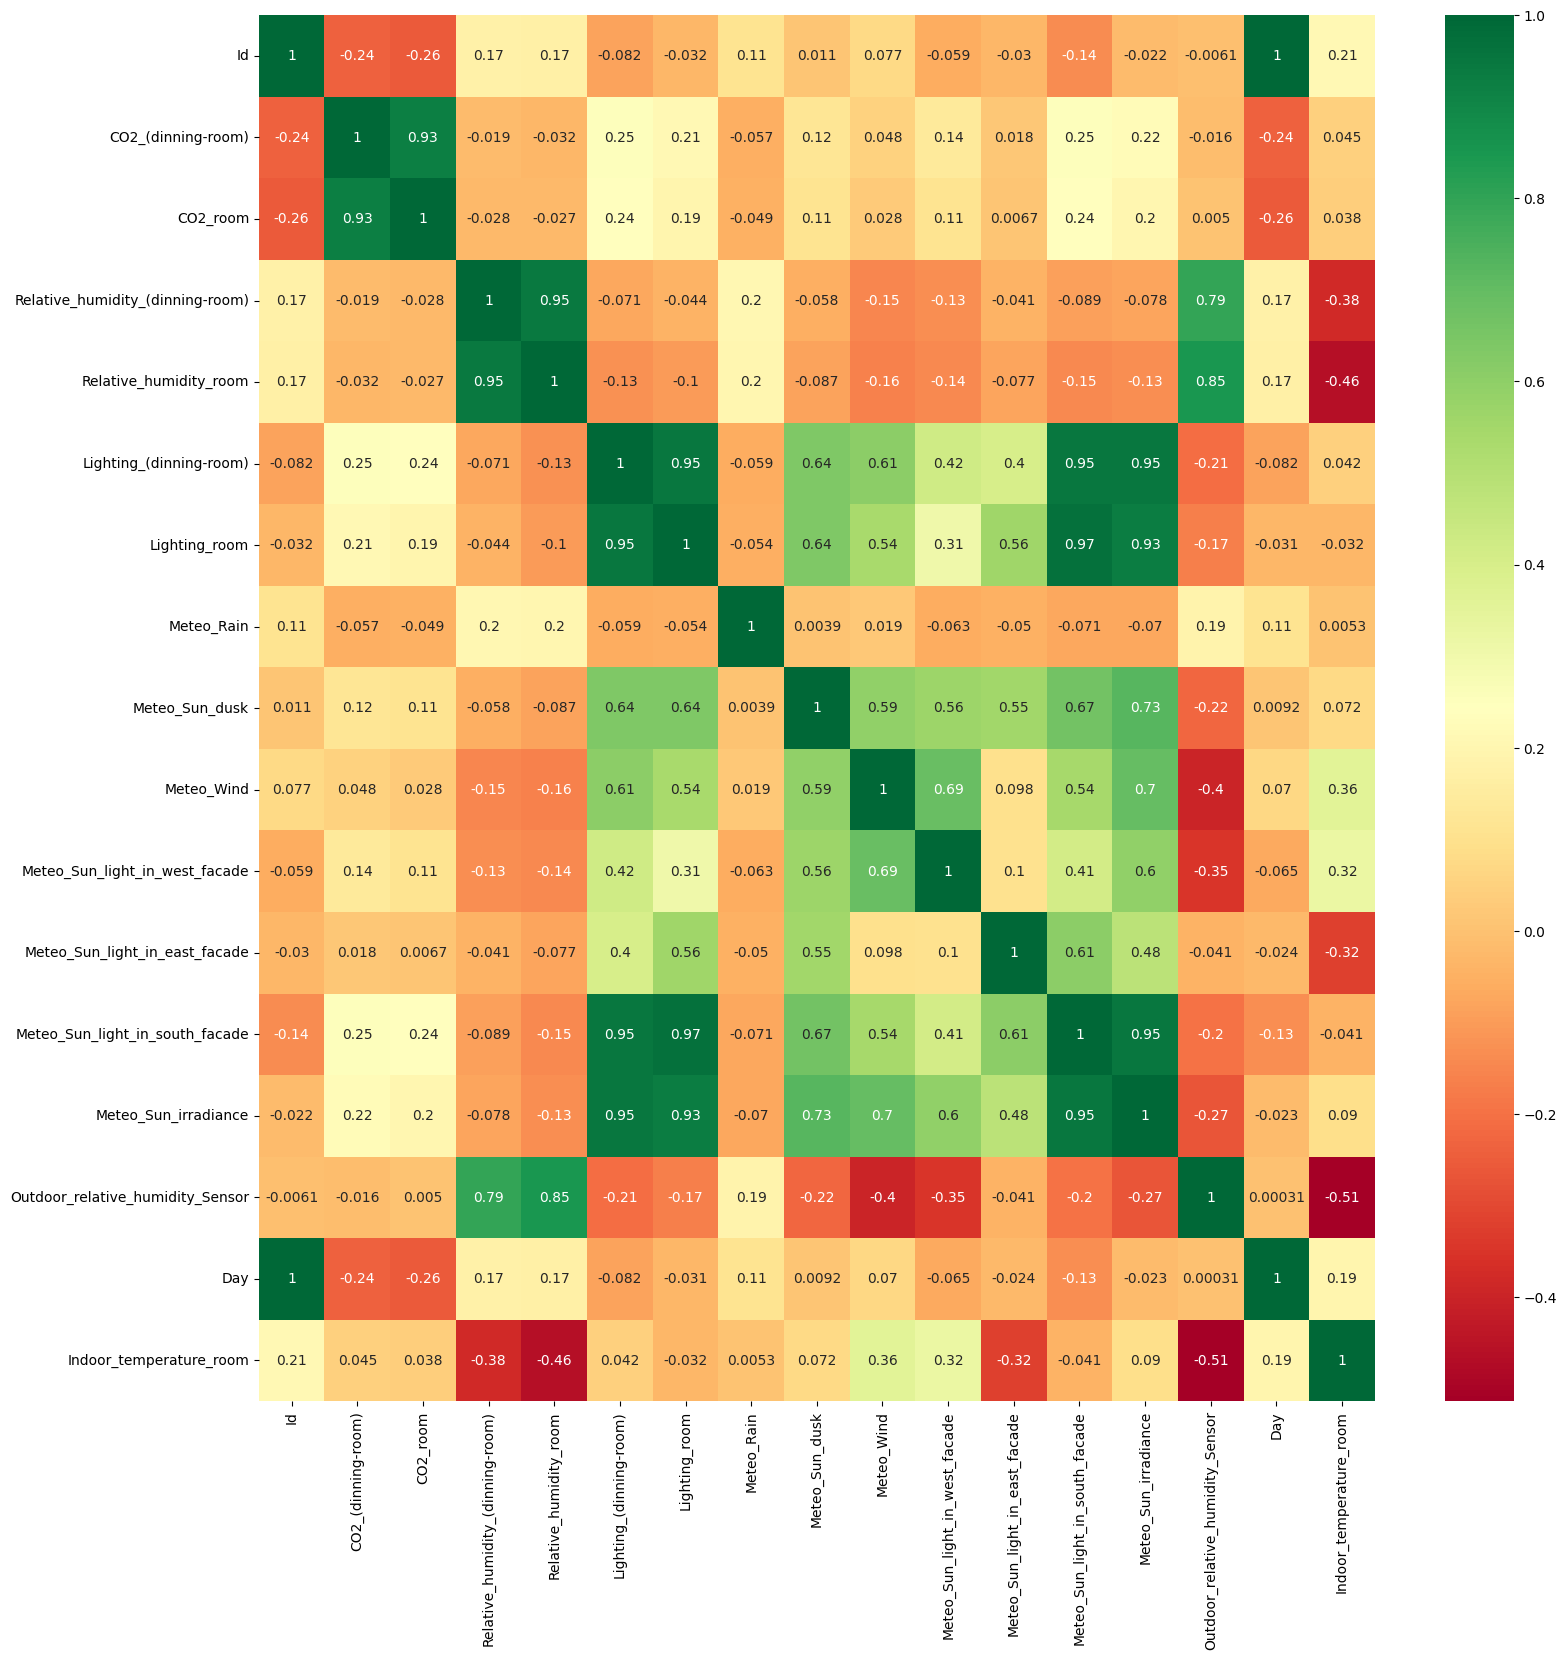

In [34]:
X_1=pd.merge(final_data,train[['Id','Indoor_temperature_room']],on='Id')
plt.figure(figsize = (18,18))
sns.heatmap(X_1.corr(), annot = True, cmap = "RdYlGn")
plt.show()

The code merges the 'final_data' DataFrame with a subset of the 'train' DataFrame containing 'Id' and 'Indoor_temperature_room' columns on the 'Id' column to create a new DataFrame 'X_1'.






In [35]:
X_1=pd.merge(final_data,train[['Id','Indoor_temperature_room']],on='Id')

In [36]:
final_data2=final_data

<a id="title-six"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>Linear Regression</center></h1>

The code merges the 'final_data2' DataFrame with the 'train' DataFrame on the 'Id' column and calculates the difference between the 'Indoor_temperature_room' column in 'X_1' and the 'Out_avg' column in the 'ad1' DataFrame, assigning the result back to the 'Indoor_temperature_room' column in 'X_1'.






In [37]:
X_1=pd.merge(final_data2,train[['Id','Indoor_temperature_room']],on='Id')
ad1=pd.merge(train['Id'],ad,on='Id')
X_1['Indoor_temperature_room']=X_1['Indoor_temperature_room']-ad1['Out_avg']

The code creates the feature matrix 'X' by dropping the 'Indoor_temperature_room' and 'Id' columns from the 'X_1' DataFrame. It also creates the target variable 'y' containing the 'Indoor_temperature_room' column from 'X_1'. Then, it performs a train-test split with 80% of the data as the training set ('x_train', 'y_train') and 20% as the validation set ('x_val', 'y_val'), while maintaining the original order of the data by setting 'shuffle=False'.






In [38]:
X=X_1.drop(['Indoor_temperature_room','Id'],axis=1)
y=X_1['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2,shuffle=False)

The code performs linear regression by fitting the 'x_train' and 'y_train' data to the model. It then uses the model to predict the target variable on the training set and calculates the mean squared error between the predicted values and the actual 'y_train' values to evaluate the model's performance.






In [39]:
from sklearn.linear_model import LinearRegression
lnr=LinearRegression()
lnr.fit(x_train,y_train)
y_pred=lnr.predict(x_train)
print("Basic model prediction accuracy=",mean_squared_error(y_pred,y_train))

Basic model prediction accuracy= 1.6832244299317782


The code uses the previously trained linear regression model ('lnr') to predict the target variable on the validation set ('x_val') and calculates the mean squared error between the predicted values ('y_pred2') and the actual 'y_val' values to evaluate the model's performance on the validation data.






In [40]:
y_pred2=lnr.predict(x_val)
print("Basic model prediction accuracy=",mean_squared_error(y_pred2,y_val))

Basic model prediction accuracy= 3.350188786994238


The code creates a pandas Series named 'some' containing the values from the predicted target variable ('y_pred') obtained using the linear regression model.






In [41]:
some=pd.Series(y_pred)

The code creates a plot with two lines: one for the predicted values ('some') and one for the actual training target values ('y_train'). The plot helps visualize the model's predictions compared to the actual training data.






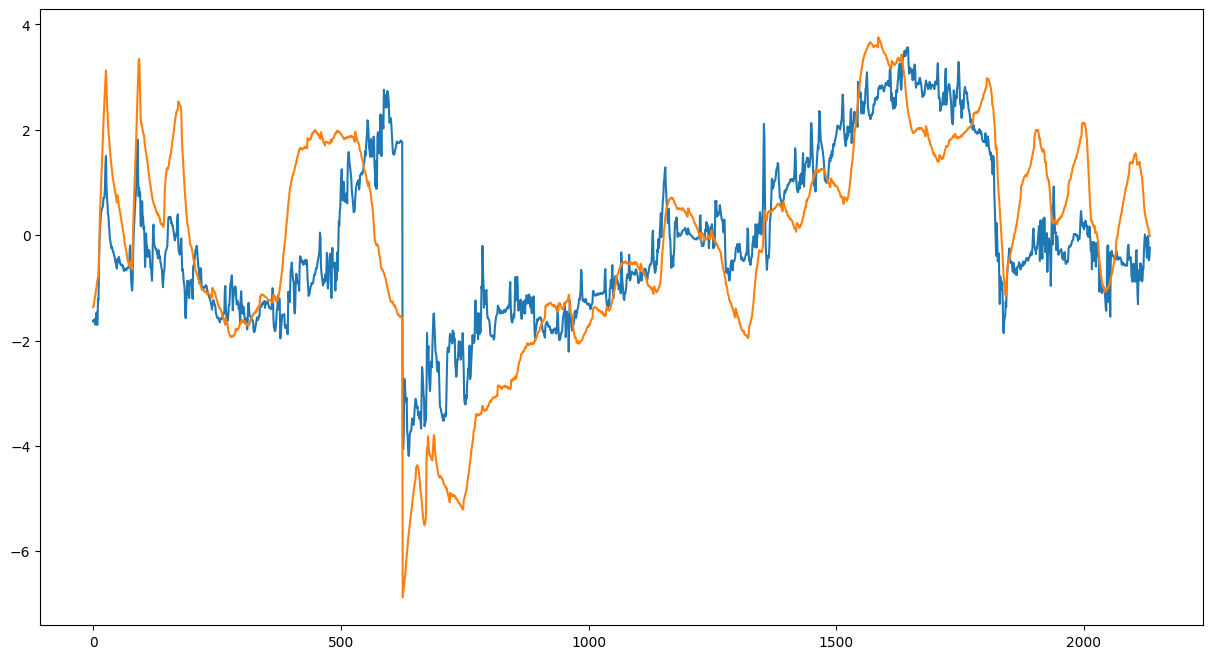

In [42]:
fig,ax=plt.subplots(figsize=(15,8))
ax.plot(some)
ax.plot(y_train)
plt.show()

The code calculates the coefficients of the linear regression model ('lnr') and then creates a bar plot to visualize the magnitude of each coefficient for the corresponding feature in 'X'.






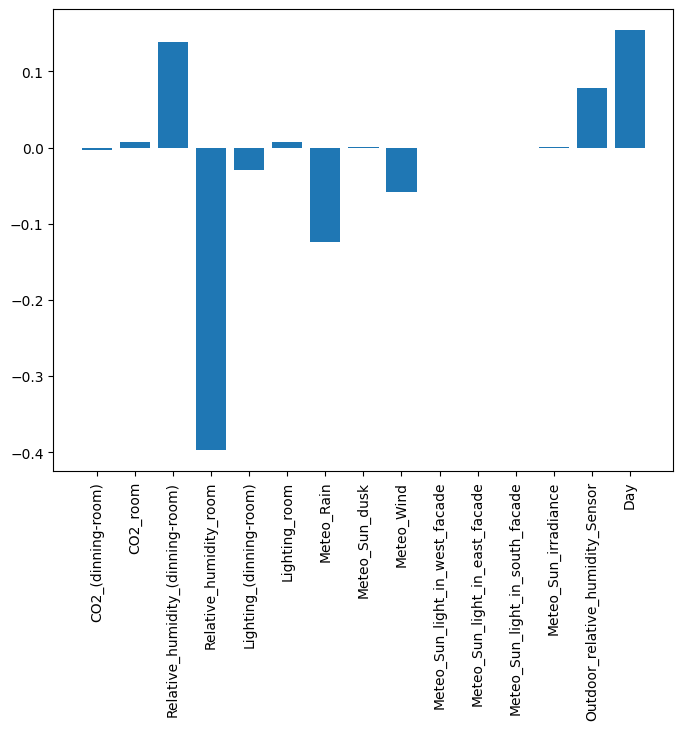

In [43]:
coeff=lnr.coef_
fig,ax=plt.subplots(figsize=(8,6))
ax.bar(x=X.columns,height=coeff)
plt.xticks(rotation=90)
plt.show()

<a id="title-seven"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>XGBRegressor</center></h1>

# XGBRegressor

In this code, 'X' is created by dropping the 'Indoor_temperature_room' and 'Id' columns from 'X_1', while 'y' is assigned the values of the 'Indoor_temperature_room' column from 'X_1'. The data is then split into training and validation sets using 'train_test_split' with a test size of 20% and a random state of 40.






In [44]:
X=X_1.drop(['Indoor_temperature_room','Id'],axis=1)
y=X_1['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In this code, 'test_data' is created by merging 'final_data2' with the 'Id' column from the 'test' data. Then, 'ad2' is created by merging 'test_data' with the 'ad' DataFrame on the 'Id' column.






In [45]:
test_data=pd.merge(final_data2,test['Id'],on='Id')
ad2=pd.merge(test_data['Id'],ad,on='Id')

In [47]:
from xgboost import XGBRegressor
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In this code, a dictionary 'params' is defined with two hyperparameters, 'n_estimators' and 'max_depth', along with their respective ranges for grid search. 'n_estimators' will be tested with values [100, 150], and 'max_depth' with values [4, 5, 6].






In [48]:
params={
    "n_estimators":[i for i in range(100,200,50)],
    "max_depth":[i for i in range(4,7,1)]
}

In this code, an XGBoost regressor model is created with a learning rate of 0.05 and 350 estimators. The model is then trained on the training data, and its mean squared error is printed. Finally, the model is used to predict the target values for the test data.






In [49]:
model1=XGBRegressor(learning_rate=0.05,n_estimators=350)
model1.fit(x_train,y_train)
pred=model1.predict(x_val)
print(mean_squared_error(pred,y_val))
predicted_val=model1.predict(test_data.drop(['Id'],axis=1))

0.027204687676638986


In this code, the XGBoost model named model1 is used to predict the target variable for the input features in X_1, excluding the 'Id' and 'Indoor_temperature_room' columns. The predictions are stored in the variable pred.






In [50]:
pred=model1.predict(X_1.drop(['Id','Indoor_temperature_room'],axis=1))

In this code, a bar plot is created to visualize the feature importance of the XGBoost model model1. The plot shows the percentage contribution of each feature in predicting the target variable.






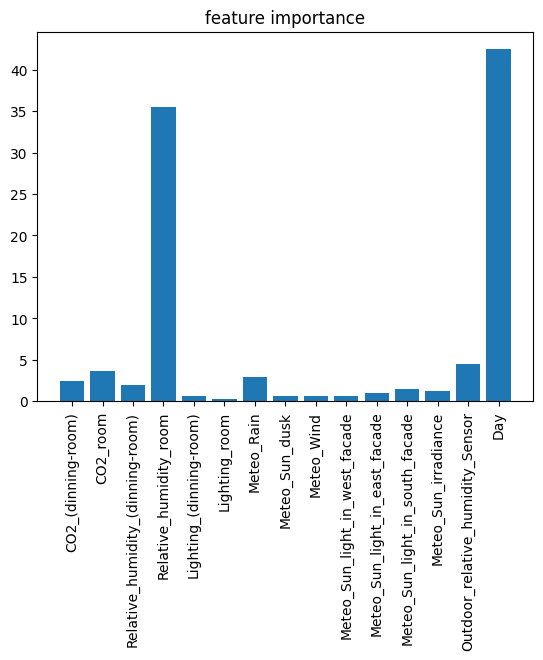

In [51]:
fig,ax=plt.subplots()
ax.bar(model1.feature_names_in_,model1.feature_importances_ *100)
plt.xticks(rotation=90)
plt.title("feature importance")
plt.show()

In this code, a figure with a single subplot is created to visualize the predicted values (pred) and the actual values (X_1['Indoor_temperature_room']) of the target variable (Indoor Temperature Room). The plot displays how well the model's predictions align with the actual data.






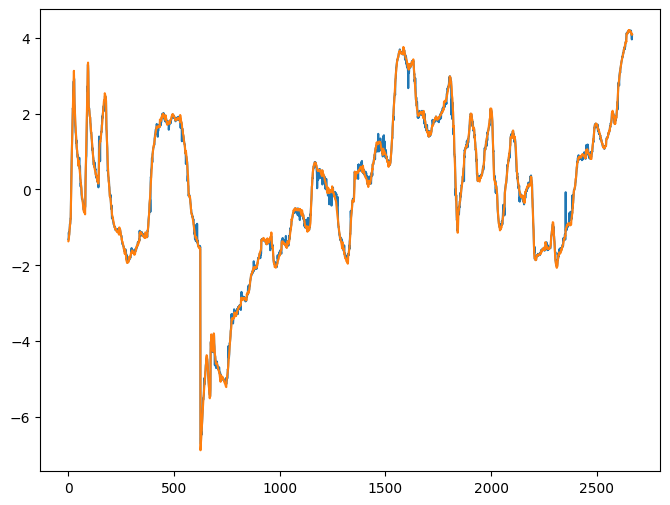

In [52]:
fig,ax=plt.subplots(figsize=(8,6))
#ax.plot(test_data['Id'],predicted_val)
ax.plot(pred)
ax.plot(X_1['Indoor_temperature_room'])
plt.show()

<a id="title-eight"></a>
<h1 style='background:#9AB0BD; border:1;height:40px; border-radius: 30px; color:black'><center>LinearBoostRegressor</center></h1>

In this code, the linear-tree package is installed quietly (without displaying output). The code then imports the LinearBoostRegressor class from the package and creates a LinearBoostRegressor object named regressor with specific configuration settings (base_estimator, n_estimators, and random_state) for the linear regression model with boosting.






In [53]:
!pip install -q --upgrade linear-tree

from lineartree import LinearBoostRegressor
regressor = LinearBoostRegressor(base_estimator=LinearRegression(),
                                 n_estimators = 600,
                                 random_state = 42)


You should consider upgrading via the 'e:\ml-projects\smart_home_s_temperature_forecasting\venv\scripts\python.exe -m pip install --upgrade pip' command.


In this code, a LinearBoostRegressor model is created using the regressor object defined earlier, and it's fitted on the training data. The model's predictions are calculated for the training, validation, and test data. The mean squared errors for training and validation predictions are printed to evaluate the model's performance.






In [54]:
#model2=LinearBoostRegressor(base_estimator=LinearRegression(),random_state=42,**best_params)
model2=regressor
model2.fit(x_train,y_train)
predicted_val2=model2.predict(test_data.drop(['Id'],axis=1))
pred=model2.predict(x_train)
pred2=model2.predict(x_val)
print(mean_squared_error(y_train,pred))
print(mean_squared_error(y_val,pred2))

0.25667471867247593
0.2912152634213443


<a id="title-nine"></a>
<h1 style='background:#9AB0BD; border:4;height:40px; border-radius: 30px; color:black'><center>MLP</center></h1>

In this code, the StandardScaler is used to standardize the numerical features in the dataframe 'X_1' except for 'Id' and 'Indoor_temperature_room'. The scaled data is stored in 'final_data2' dataframe.






In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
ss=StandardScaler()
ss.fit(X_1.drop(['Id','Indoor_temperature_room'],axis=1))
df=ss.transform(final_data.drop(['Id'],axis=1))
final_data2=pd.DataFrame(df,index=final_data.index,columns=final_data.columns[1:])
final_data2=pd.concat([final_data2,final_data['Id']],axis=1)

In this code, 'final_data2' and the 'train' dataframe are merged based on the 'Id' column, and the resulting dataframe is stored in 'X_1'. The 'Indoor_temperature_room' column in 'X_1' is then adjusted by subtracting the corresponding values from the 'ad1' dataframe based on the 'Id' column.






In [56]:
X_1=pd.merge(final_data2,train[['Id','Indoor_temperature_room']],on='Id')
ad1=pd.merge(train['Id'],ad,on='Id')
X_1['Indoor_temperature_room']=X_1['Indoor_temperature_room']-ad1['Out_avg']

In this code, 'X_1' dataframe is split into features 'X' (excluding 'Indoor_temperature_room' and 'Id') and target 'y' (containing only 'Indoor_temperature_room'). The data is then divided into training and validation sets using a test size of 20% and a random state of 40.






In [57]:
X=X_1.drop(['Indoor_temperature_room','Id'],axis=1)
y=X_1['Indoor_temperature_room']
x_train, x_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=40)

In this code, the 'final_data2' dataframe is merged with the 'test' dataframe based on the 'Id' column to create the 'test_data' dataframe. Then, the 'ad' dataframe is merged with 'test_data' again based on the 'Id' column to create the 'ad2' dataframe.






In [58]:
test_data=pd.merge(final_data2,test['Id'],on='Id')
ad2=pd.merge(test_data['Id'],ad,on='Id')

In [59]:
from sklearn.neural_network import MLPRegressor

In [61]:
from tensorflow import keras as k
from tensorflow.keras import layers
from tensorflow.keras import Sequential

In this code, a neural network model 'model3' is defined using the Keras Sequential API with three hidden layers and dropout layers for regularization. The model is compiled using the Adam optimizer and mean squared error as the loss function. An early stopping callback is also defined to stop training if the loss does not improve for three consecutive epochs.






In [62]:
model3=Sequential()
model3.add(layers.Dense(64,activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Dense(32,activation='relu'))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(1))
model3.compile(optimizer='adam', loss='mean_squared_error')
callback = k.callbacks.EarlyStopping(monitor='loss', patience=3)

In [65]:
model3.fit(x_train,y_train, epochs=100,validation_data=(x_val,y_val),shuffle=True,callbacks=[callback])

Epoch 1/100


67/67 [==============================] - 0s 3ms/step - loss: 0.5321 - val_loss: 0.3746
Epoch 2/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5331 - val_loss: 0.3786
Epoch 3/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5246 - val_loss: 0.3774
Epoch 4/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5084 - val_loss: 0.3699
Epoch 5/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5169 - val_loss: 0.3643
Epoch 6/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5048 - val_loss: 0.3727
Epoch 7/100
67/67 [==============================] - 0s 2ms/step - loss: 0.4790 - val_loss: 0.3476
Epoch 8/100
67/67 [==============================] - 0s 2ms/step - loss: 0.4794 - val_loss: 0.3439
Epoch 9/100
67/67 [==============================] - 0s 2ms/step - loss: 0.5104 - val_loss: 0.3574
Epoch 10/100
67/67 [==============================] - 0s 2ms/step - loss: 0.4742 - val_loss: 0.3550
Epoch 11/100
67/67 [=

The code uses the trained model model3 to predict indoor room temperatures (pred) based on the features in the DataFrame X_1. It then plots the actual indoor room temperatures and the predicted temperatures to visualize the model's performance.



84/84 [==============================] - 0s 909us/step


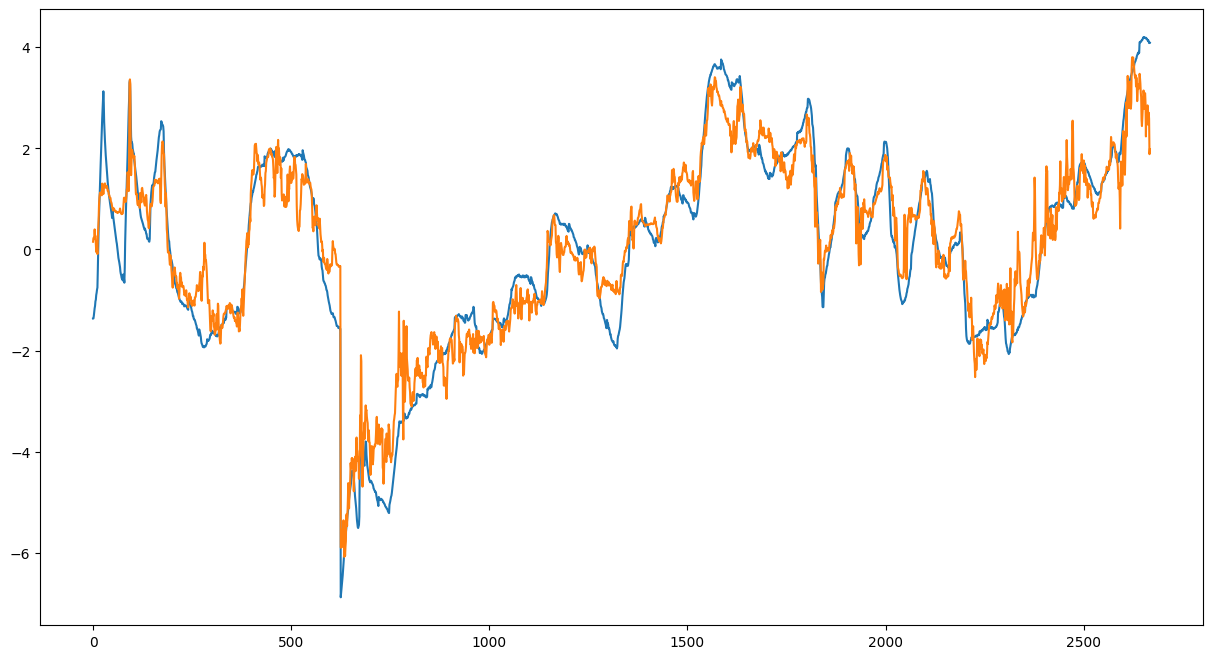

In [64]:
pred=model3.predict(X_1.drop(['Id','Indoor_temperature_room'],axis=1))
fig,ax=plt.subplots(figsize=(15,8))
ax.plot((X_1['Indoor_temperature_room']))
ax.plot(pred)
plt.show()